In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.densenet import DenseNet201
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2 as cv
import PIL
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
os.chdir('/content/drive/MyDrive/cell_images')

In [ ]:
class_label_distribution={'parasitized':len(os.listdir('/content/drive/MyDrive/cell_images/Parasitized')),
                          'un_infected':len(os.listdir('/content/drive/MyDrive/cell_images/Uninfected')),
                         }

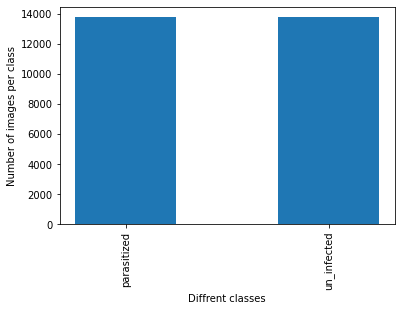

In [ ]:
y_pos = range(len(class_label_distribution.keys()))
plt.bar(y_pos, class_label_distribution.values(),width=0.5)
plt.xticks(y_pos, class_label_distribution.keys(), rotation=90)
plt.xlabel('Diffrent classes')
plt.ylabel('Number of images per class')
plt.show()

In [ ]:
parasitized = cv.imread('/content/drive/MyDrive/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')
un_infected = cv.imread('/content/drive/MyDrive/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png')


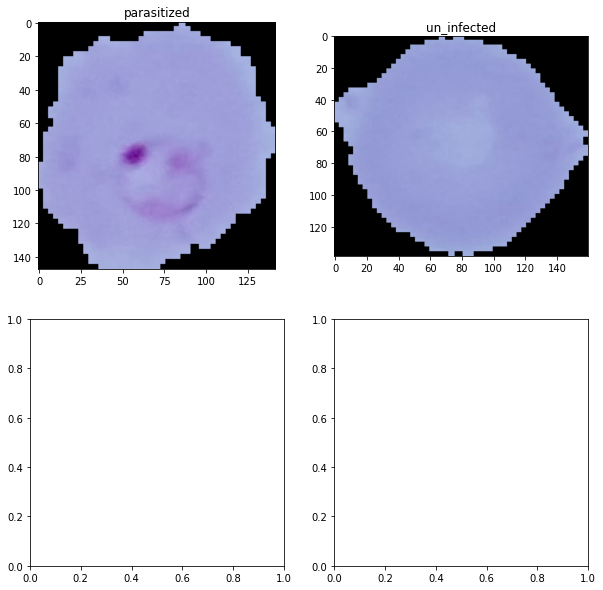

In [ ]:
f, axarr = plt.subplots(2,2,figsize=(10,10))
axarr[0,0].imshow(parasitized)
axarr[0,1].imshow(un_infected)


axarr[0,0].set_title('parasitized')
axarr[0,1].set_title('un_infected')


plt.show()

In [ ]:
image = PIL. Image. open("/content/drive/MyDrive/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
width, height = image. size
print(width, height)
#all the images in the datsets are of size 160x139

160 139


In [ ]:
batch_size = 64
img_height = 256
img_width = 256
data_dir = '/content/drive/MyDrive/cell_images'

In [ ]:
img_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      "/content/drive/MyDrive/cell_images",
      rescale=1.0/255.0,
      validation_split=0.3,
      rotation_range=5,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.05,
      height_shift_range=0.05,
      horizontal_flip=True,
      vertical_flip=True
                )

In [ ]:
train_gen = img_datagen.flow_from_directory(
                            data_dir,
                            subset="training",
                            seed=42,
                            target_size=(img_height, img_width),
                            batch_size=batch_size,
                            class_mode="binary",
            )

Found 19292 images belonging to 2 classes.


In [ ]:
valid_gen = img_datagen.flow_from_directory(
                            data_dir,
                            subset="validation",
                            seed=42,
                            target_size=(img_height, img_width),
                            batch_size=batch_size,
                            class_mode="binary"
            )

Found 8266 images belonging to 2 classes.


In [ ]:
print('Total No Of Classes in the datasetL:',len(train_gen.class_indices))
print('Class Names:',train_gen.class_indices)

Total No Of Classes in the datasetL: 2
Class Names: {'Parasitized': 0, 'Uninfected': 1}


In [ ]:
model = None
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit(
  train_gen,
  validation_data=valid_gen,
  epochs=10,
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
302/302 [==============================] - 405s 1s/step - loss: 1.4374 - accuracy: 0.5365 - val_loss: 0.6805 - val_accuracy: 0.5000
Epoch 2/10
302/302 [==============================] - 399s 1s/step - loss: 0.6075 - accuracy: 0.6851 - val_loss: 0.6556 - val_accuracy: 0.5714
Epoch 3/10
302/302 [==============================] - 398s 1s/step - loss: 0.2843 - accuracy: 0.9013 - val_loss: 0.5480 - val_accuracy: 0.9127
Epoch 4/10
302/302 [==============================] - 399s 1s/step - loss: 0.2401 - accuracy: 0.9191 - val_loss: 0.5149 - val_accuracy: 0.9225
Epoch 5/10
302/302 [==============================] - 400s 1s/step - loss: 0.2269 - accuracy: 0.9263 - val_loss: 0.4776 - val_accuracy: 0.9133
Epoch 6/10
302/302 [==============================] - 399s 1s/step - loss: 0.2123 - accuracy: 0.9297 - val_loss: 0.4523 - val_accuracy: 0.9352
Epoch 7/10
302/302 [==============================] - 399s 1s/step - loss: 0.2119 - accuracy: 0.9306 - val_loss: 0.4382 - val_accuracy: 0.9320

In [ ]:
model.save('/content/drive/MyDrive/bioe_project_models')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/bioe_project_models/assets


In [ ]:
cnn_accuracy = r.history['accuracy']
cnn_loss = r.history['loss']
cnn_val_accuracy = r.history['val_accuracy']
cnn_val_loss = r.history['val_loss']

In [ ]:
range = np.arange(1,11)

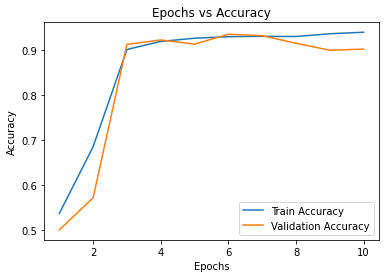

In [ ]:
plt.plot(range,cnn_accuracy,label='Train Accuracy')
plt.plot(range,cnn_val_accuracy,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend()
plt.show()

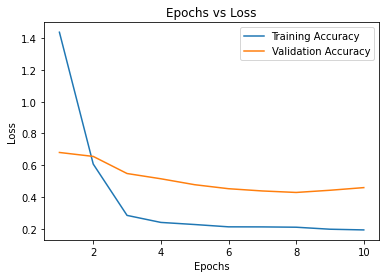

In [ ]:
plt.plot(range,cnn_loss,label='Training Loss')
plt.plot(range,cnn_val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.show()

In [ ]:
vgg_16  = None
vgg_16  = VGG16(include_top = False,input_shape=(256,256,3),weights = 'imagenet')

58900480/58889256 [==============================] - 3s 0us/step


In [ ]:
for layer in vgg_16.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg_16.output)
prediction_vgg_16 = Dense(1,activation='sigmoid')(x)
model_vgg_16 = Model(inputs = vgg_16.input,outputs=prediction_vgg_16)
model_vgg_16.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
model_vgg_16.compile(
  loss=tf.keras.losses.BinaryCrossentropy(),
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
vgg_16_history = model_vgg_16.fit(
  train_gen,
  validation_data=valid_gen,
  epochs=10,
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
302/302 [==============================] - 425s 1s/step - loss: 0.3932 - accuracy: 0.8295 - val_loss: 0.4520 - val_accuracy: 0.7895
Epoch 2/10
302/302 [==============================] - 421s 1s/step - loss: 0.2821 - accuracy: 0.8871 - val_loss: 0.2968 - val_accuracy: 0.8854
Epoch 3/10
302/302 [==============================] - 422s 1s/step - loss: 0.2569 - accuracy: 0.8980 - val_loss: 0.3029 - val_accuracy: 0.8767
Epoch 4/10
302/302 [==============================] - 422s 1s/step - loss: 0.2392 - accuracy: 0.9074 - val_loss: 0.2754 - val_accuracy: 0.8916
Epoch 5/10
302/302 [==============================] - 422s 1s/step - loss: 0.2285 - accuracy: 0.9126 - val_loss: 0.2919 - val_accuracy: 0.8793
Epoch 6/10
302/302 [==============================] - 423s 1s/step - loss: 0.2520 - accuracy: 0.9027 - val_loss: 0.2607 - val_accuracy: 0.9039
Epoch 7/10
302/302 [==============================] - 422s 1s/step - loss: 0.2195 - accuracy: 0.9148 - val_loss: 0.2594 - val_accuracy: 0.8974

In [ ]:
model_vgg_16.save('/content/drive/MyDrive/bioe_project_models')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/bioe_project_models/assets


In [ ]:
vgg16_accuracy = vgg_16_history.history['accuracy']
vgg16_loss = vgg_16_history.history['loss']
vgg16_val_accuracy = vgg_16_history.history['val_accuracy']
vgg16_val_loss = vgg_16_history.history['val_loss']

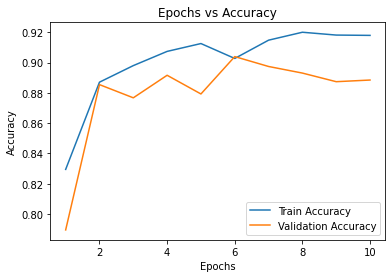

In [ ]:
plt.plot(range,vgg16_accuracy,label='Train Accuracy')
plt.plot(range,vgg16_val_accuracy,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend()
plt.show()

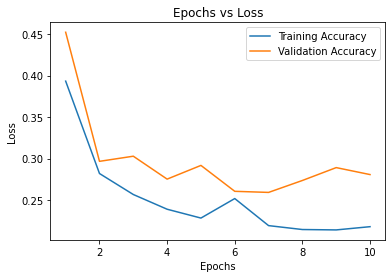

In [ ]:
plt.plot(range,vgg16_loss,label='Training Loss')
plt.plot(range,vgg16_val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.show()

In [ ]:
resnet_50 = None
resnet_50 = ResNet50(input_shape=(256,256,3), weights='imagenet', include_top=False)

In [ ]:
for layer in resnet_50.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(resnet_50.output)
prediction_resnet_50 = Dense(1, activation='sigmoid')(x)

In [ ]:
model_resnet_50 = Model(inputs=resnet_50.input, outputs=prediction_resnet_50)

In [ ]:
model_resnet_50.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model_resnet_50.compile(
  loss=tf.keras.losses.BinaryCrossentropy(),
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model_resnet_50_history = model_resnet_50.fit(train_gen, 
                    epochs = 10,
                    validation_data=valid_gen)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
302/302 [==============================] - 414s 1s/step - loss: 0.9475 - accuracy: 0.5584 - val_loss: 0.9233 - val_accuracy: 0.5040
Epoch 2/10
302/302 [==============================] - 406s 1s/step - loss: 0.7080 - accuracy: 0.6001 - val_loss: 0.5942 - val_accuracy: 0.6919
Epoch 3/10
302/302 [==============================] - 406s 1s/step - loss: 0.7165 - accuracy: 0.6087 - val_loss: 1.1055 - val_accuracy: 0.5044
Epoch 4/10
302/302 [==============================] - 405s 1s/step - loss: 0.7207 - accuracy: 0.6225 - val_loss: 0.9584 - val_accuracy: 0.5093
Epoch 5/10
302/302 [==============================] - 405s 1s/step - loss: 0.7274 - accuracy: 0.6179 - val_loss: 1.0144 - val_accuracy: 0.5131
Epoch 6/10
302/302 [==============================] - 405s 1s/step - loss: 0.6855 - accuracy: 0.6408 - val_loss: 0.5633 - val_accuracy: 0.7047
Epoch 7/10
302/302 [==============================] - 406s 1s/step - loss: 0.6963 - accuracy: 0.6511 - val_loss: 0.5316 - val_accuracy: 0.7482

In [ ]:
model_resnet_50.save('/content/drive/MyDrive/bioe_project_models')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/bioe_project_models/assets


In [ ]:
resnet50_accuracy = model_resnet_50_history.history['accuracy']
resnet50_loss = model_resnet_50_history.history['loss']
resnet50_val_accuracy = model_resnet_50_history.history['val_accuracy']
resnet50_val_loss = model_resnet_50_history.history['val_loss']

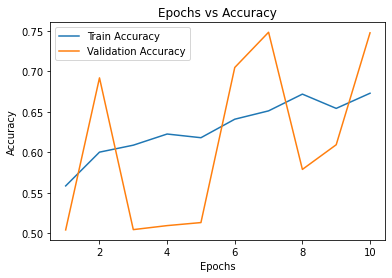

In [ ]:
plt.plot(range,resnet50_accuracy,label='Train Accuracy')
plt.plot(range,resnet50_val_accuracy,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend()
plt.show()

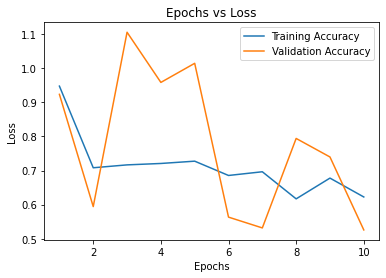

In [ ]:
plt.plot(range,resnet50_loss,label='Training Loss')
plt.plot(range,resnet50_val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.show()

In [ ]:
resnet_101 = None
resnet_101 = ResNet101(input_shape=(256,256,3), weights='imagenet', include_top=False)

171458560/171446536 [==============================] - 2s 0us/step


In [ ]:
for layer in resnet_101.layers:
  layer.trainable = False

In [ ]:
densenet_201 = DenseNet201(input_shape=(256,256,3), weights='imagenet', include_top=False)

In [ ]:
for layer in densenet_201.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(resnet_101.output)
prediction_resnet_101 = Dense(1, activation='sigmoid')(x)

In [ ]:
model_resnet_101 = Model(inputs=resnet_101.input, outputs=prediction_resnet_101)

In [ ]:
model_resnet_101.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model_resnet_101.compile(
  loss=tf.keras.losses.BinaryCrossentropy(),
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model_resnet_101_history = model_resnet_101.fit(train_gen, 
                    epochs = 10,
                    validation_data=valid_gen)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
302/302 [==============================] - 436s 1s/step - loss: 0.9455 - accuracy: 0.5967 - val_loss: 0.5994 - val_accuracy: 0.6559
Epoch 2/10
302/302 [==============================] - 430s 1s/step - loss: 0.7139 - accuracy: 0.6291 - val_loss: 0.7653 - val_accuracy: 0.5599
Epoch 3/10
302/302 [==============================] - 421s 1s/step - loss: 0.6367 - accuracy: 0.6636 - val_loss: 0.6961 - val_accuracy: 0.6130
Epoch 4/10
302/302 [==============================] - 421s 1s/step - loss: 0.6307 - accuracy: 0.6697 - val_loss: 0.5954 - val_accuracy: 0.6720
Epoch 5/10
302/302 [==============================] - 421s 1s/step - loss: 0.6638 - accuracy: 0.6590 - val_loss: 0.4978 - val_accuracy: 0.7596
Epoch 6/10
302/302 [==============================] - 424s 1s/step - loss: 0.6134 - accuracy: 0.6927 - val_loss: 0.4896 - val_accuracy: 0.7681
Epoch 7/10
302/302 [==============================] - 426s 1s/step - loss: 0.6171 - accuracy: 0.6870 - val_loss: 0.4949 - val_accuracy: 0.7654

In [ ]:
model_resnet_101.save('/content/drive/MyDrive/bioe_project_models')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/bioe_project_models/assets


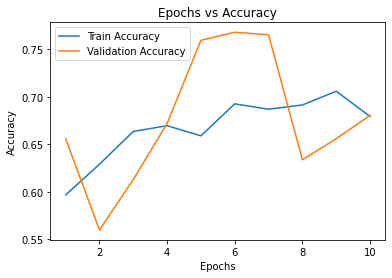

In [ ]:
plt.plot(np.arange(1,11),model_resnet_101_history.history['accuracy'],label='Train Accuracy')
plt.plot(np.arange(1,11),model_resnet_101_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend()
plt.show()

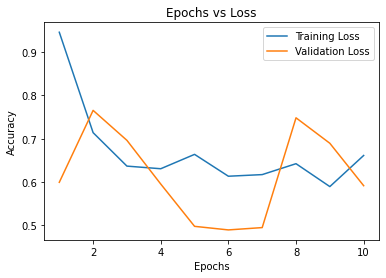

In [ ]:
plt.plot(np.arange(1,11),model_resnet_101_history.history['loss'],label='Training Loss')
plt.plot(np.arange(1,11),model_resnet_101_history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Loss')
plt.legend()
plt.show()

In [ ]:
densenet_201 = DenseNet201(input_shape=(256,256,3), weights='imagenet', include_top=False)

In [ ]:
for layer in densenet_201.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(densenet_201.output)
prediction_Dense_201 = Dense(1, activation='sigmoid')(x)

In [ ]:
model_densenet_201 = Model(inputs=densenet_201.input, outputs=prediction_Dense_201)

In [ ]:
model_densenet_201.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 262, 262, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

In [ ]:
model_densenet_201.compile(
  loss=tf.keras.losses.BinaryCrossentropy(),
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model_densenet_201_history = model_densenet_201.fit(
    train_gen, 
    epochs = 10, 
    validation_data=valid_gen)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
302/302 [==============================] - 437s 1s/step - loss: 0.5485 - accuracy: 0.8965 - val_loss: 0.3569 - val_accuracy: 0.9209
Epoch 2/10
302/302 [==============================] - 420s 1s/step - loss: 0.3706 - accuracy: 0.9199 - val_loss: 0.4960 - val_accuracy: 0.8853
Epoch 3/10
302/302 [==============================] - 420s 1s/step - loss: 0.4248 - accuracy: 0.9210 - val_loss: 0.6535 - val_accuracy: 0.9134
Epoch 4/10
302/302 [==============================] - 418s 1s/step - loss: 0.4474 - accuracy: 0.9285 - val_loss: 0.3901 - val_accuracy: 0.9315
Epoch 5/10
302/302 [==============================] - 418s 1s/step - loss: 0.4589 - accuracy: 0.9253 - val_loss: 0.5071 - val_accuracy: 0.9284
Epoch 6/10
302/302 [==============================] - 418s 1s/step - loss: 0.4988 - accuracy: 0.9268 - val_loss: 0.6250 - val_accuracy: 0.9143
Epoch 7/10
302/302 [==============================] - 418s 1s/step - loss: 0.5476 - accuracy: 0.9232 - val_loss: 0.4425 - val_accuracy: 0.9391

In [ ]:
model_densenet_201.save('/content/drive/MyDrive/bioe_project_models')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/bioe_project_models/assets


In [ ]:
densenet201_accuracy = model_densenet_201_history.history['accuracy']
densenet201_loss = model_densenet_201_history.history['loss']
densenet201_val_accuracy = model_densenet_201_history.history['val_accuracy']
densenet201_val_loss = model_densenet_201_history.history['val_loss']

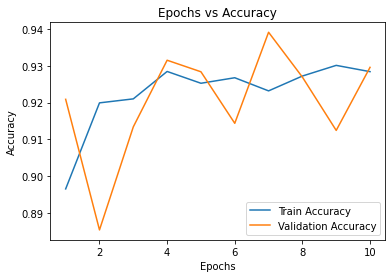

In [ ]:
plt.plot(range,densenet201_accuracy,label='Train Accuracy')
plt.plot(range,densenet201_val_accuracy,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend()
plt.show()

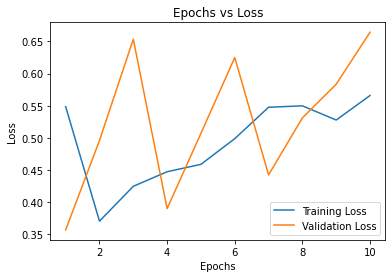

In [ ]:
plt.plot(range,densenet201_loss,label='Training Loss')
plt.plot(range,densenet201_val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.show()

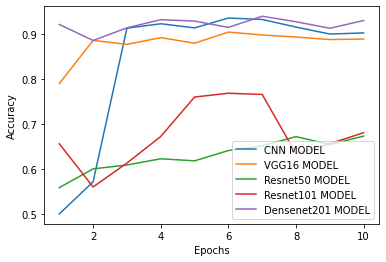

In [ ]:
plt.plot(np.arange(1,11),cnn_val_accuracy,label='CNN MODEL')
plt.plot(np.arange(1,11),vgg16_val_accuracy,label='VGG16 MODEL')
plt.plot(np.arange(1,11),resnet50_accuracy,label='Resnet50 MODEL')
plt.plot(np.arange(1,11),model_resnet_101_history.history['val_accuracy'],label='Resnet101 MODEL')
plt.plot(np.arange(1,11),densenet201_val_accuracy,label='Densenet201 MODEL')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()